### During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA
### E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ


Today we live in era of Sharing Economy.The biggest company like Amazon,Airbnb,Uber,Swiggy etc dont own much physical assets.But they are using software to optimize the use of the assets available.In this kernel we will be covering following topics.

1.Importing,Analysis and Vizualization of Data

2.Checking Multi Linear Regression Assumptions like 
  
  -Normality 

  -Linear Correlation 
  
  -Multicollinearity
  
  -Autocorrelation 
  
  -Sample Size 

3.Drop Irrevalent features 

4.Creating and Modifying features

5.Create Dummy Variables 

6.Train Test Split 

7.Fit and Score Model 

8.Present the Results 

If you like the kernel please do vote.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


# 1.Importing,Analysing and Vizualization of Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math 

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df1=pd.read_csv('../input/bike-sharing-demand/train.csv',parse_dates=['datetime'],index_col=0)
df_test=pd.read_csv('../input/bike-sharing-demand/test.csv',parse_dates=['datetime'],index_col=0)
df1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#df1.info()
def add_feature(df1):
    df1['year']=df1.index.year
    df1['month']=df1.index.month
    df1['dayofmonth']=df1.index.day
    df1['dayofweek']=df1.index.dayofweek
    df1['hour']=df1.index.hour

In [6]:
add_feature(df1)
add_feature(df_test)
df1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofmonth,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [7]:
df1.shape

(10886, 16)

In [8]:
df =df1.copy()

### Rename Columns 

In [9]:
df = df.rename(columns={'count':'demand'})

### Dropping unwanted columns 

In [10]:
df.reset_index(drop=True, inplace=True)
df = df.drop(['casual','registered'],axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,demand,year,month,dayofmonth,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4


We have dropped the index, Datetime,Casual and Registered columns from our dataset.The column count is a sum of Casual and Registered,We will be predicting the column count so we habe dropped the columns casual and registered from our dataset.

### Checking Missing Values 

In [11]:
df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
year          0
month         0
dayofmonth    0
dayofweek     0
hour          0
dtype: int64

We can see that there are no missing values in the dataset.So we can proceed further.

### Histogram

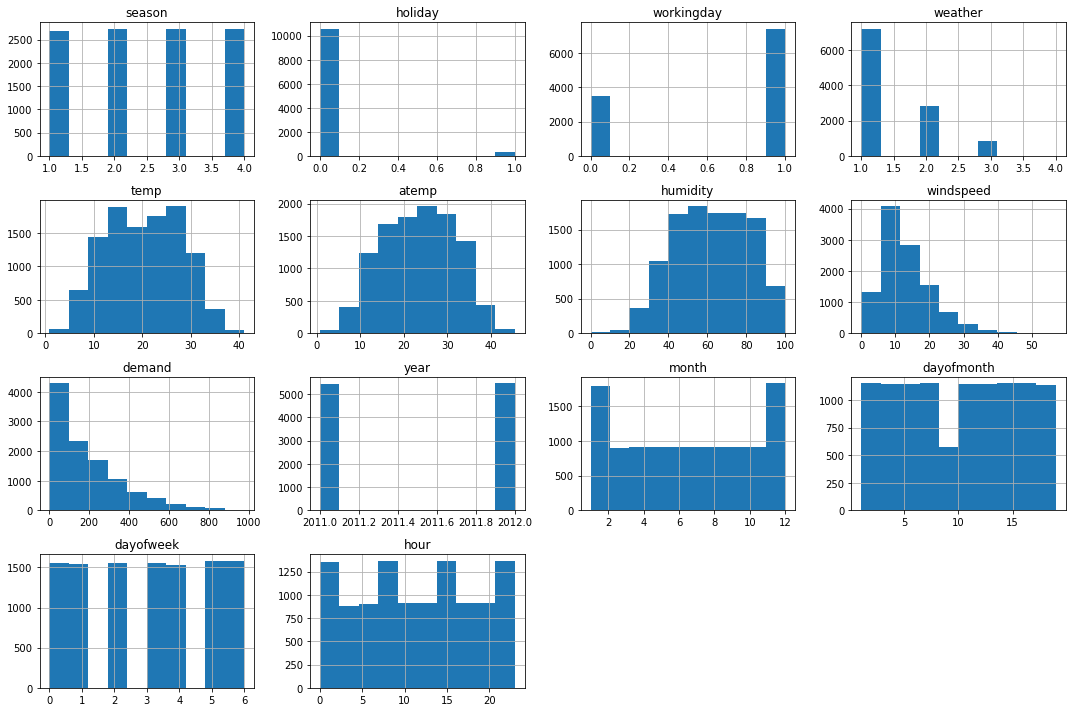

In [12]:
df.hist(figsize = (15,10))
plt.tight_layout()
plt.show()

We can see that the demand remains same for all the fours seasons.So we can drop this feature while predicting the demand.The count(demand) is not normally distributed.We need to transform the count(demand) feature.

### Vizualise the Continous features Vs Demand (Count)

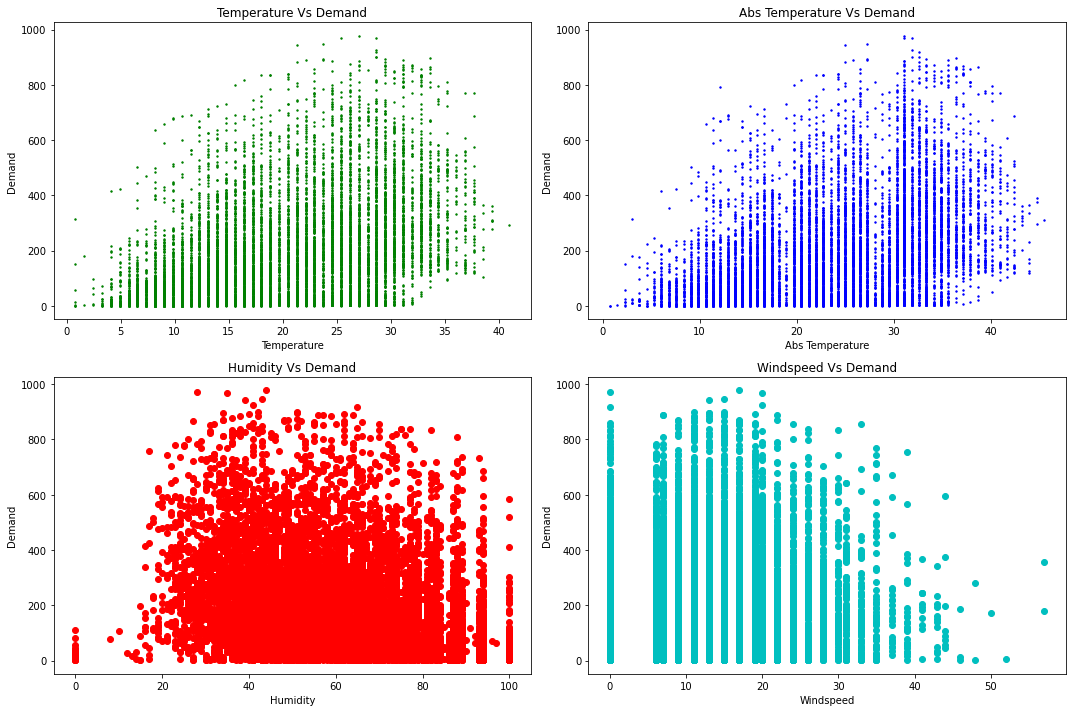

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1,)
plt.title('Temperature Vs Demand')
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.scatter(df['temp'],df['demand'],s=2,c='g')

plt.subplot(2,2,2)
plt.title('Abs Temperature Vs Demand')
plt.xlabel('Abs Temperature')
plt.ylabel('Demand')
plt.scatter(df['atemp'],df['demand'],s=2,c='b')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.xlabel('Humidity')
plt.ylabel('Demand')
plt.scatter(df['humidity'],df['demand'],c='r')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.xlabel('Windspeed')
plt.ylabel('Demand')
plt.scatter(df['windspeed'],df['demand'],c='c')

plt.tight_layout()

pass

From the above plots we can see that temperature and Windspeed Have an affect on Bike demand.

Temperature and Absolute temperature plots are alsmost similar in nature.This indicated high colinearity between the two feature.We can drop one of the features to avoid the colinearity.

### Visualse the categorical features

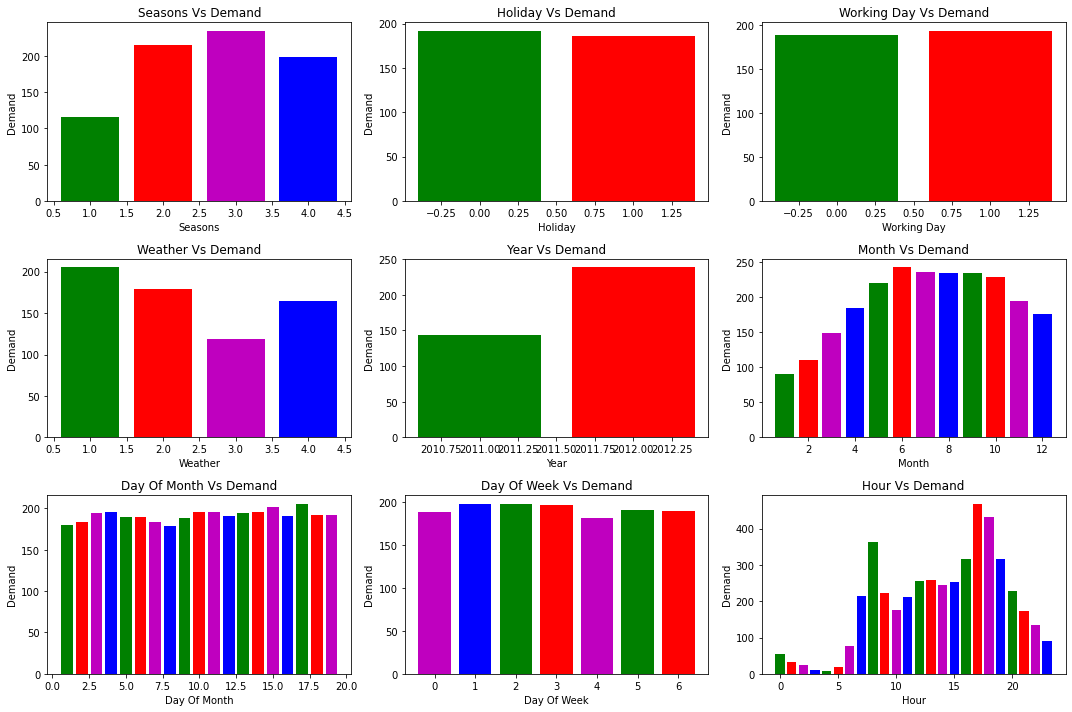

In [14]:
colors = ['g','r','m','b']

plt.figure(figsize=(15,10))
plt.subplot(3,3,1,)
plt.title('Seasons Vs Demand')
plt.xlabel('Seasons')
plt.ylabel('Demand')
cat_list=df['season'].unique()
cat_average=df.groupby('season').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,2,)
plt.title('Holiday Vs Demand')
plt.xlabel('Holiday')
plt.ylabel('Demand')
cat_list=df['holiday'].unique()
cat_average=df.groupby('holiday').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,3,)
plt.title('Working Day Vs Demand')
plt.xlabel('Working Day')
plt.ylabel('Demand')
cat_list=df['workingday'].unique()
cat_average=df.groupby('workingday').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,4,)
plt.title('Weather Vs Demand')
plt.xlabel('Weather')
plt.ylabel('Demand')
cat_list=df['weather'].unique()
cat_average=df.groupby('weather').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,5,)
plt.title('Year Vs Demand')
plt.xlabel('Year')
plt.ylabel('Demand')
cat_list=df['year'].unique()
cat_average=df.groupby('year').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,6,)
plt.title('Month Vs Demand')
plt.xlabel('Month')
plt.ylabel('Demand')
cat_list=df['month'].unique()
cat_average=df.groupby('month').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,7,)
plt.title('Day Of Month Vs Demand')
plt.xlabel('Day Of Month')
plt.ylabel('Demand')
cat_list=df['dayofmonth'].unique()
cat_average=df.groupby('dayofmonth').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,8,)
plt.title('Day Of Week Vs Demand')
plt.xlabel('Day Of Week')
plt.ylabel('Demand')
cat_list=df['dayofweek'].unique()
cat_average=df.groupby('dayofweek').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,9,)
plt.title('Hour Vs Demand')
plt.xlabel('Hour')
plt.ylabel('Demand')
cat_list=df['hour'].unique()
cat_average=df.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)


plt.tight_layout()
pass

We can see that the features working day,holiday,day of month,day of week, dont have any affect on the bike demand.So we can drop these features from our prediction  model.Also we have data for only two years.So the column of year can also be dropped from our dataset.From the Hour plot we can clearly make out that the demand for bikes is highest at 8 am and 5 pm.This is due to more demand during office going hours.

# 2.Checking Multi Linear Regression Assumptions

In [15]:
df_prep = df.copy()
#df_prep

### Checking Outliers

In [16]:
df_prep['demand'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: demand, dtype: float64

From the above stats we can see that 50% of the values lie between demand value 42 to 284.Now we will analyse the outliers in the dataset.

In [17]:
df_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    452.00
0.99    774.15
Name: demand, dtype: float64

From the data we can say 5% of the time the demand was less than 5 and 1 % of the time the demand was more than 774.

### Checking Multicollinearity

In [18]:
correlation = df_prep[['temp','atemp','humidity','demand']].corr()
correlation

,temp,atemp,humidity,demand
temp,1.000000,0.984948,-0.064949,0.394454
atemp,0.984948,1.000000,-0.043536,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.317371
demand,0.394454,0.389784,-0.317371,1.000000


We can see that there is a high correlation between temp and atemp.There is a neegative correlation between the demand and humidity.

# 3.Dropping Unwanted Features 

In [19]:
#df.head()

In [20]:
df_prep = df_prep.drop(['atemp','holiday','workingday','year','dayofmonth','dayofweek'],axis=1)
df_prep.head()


,season,weather,temp,humidity,windspeed,demand,month,hour
0,1,1,9.84,81,0.0,16,1,0
1,1,1,9.02,80,0.0,40,1,1
2,1,1,9.02,80,0.0,32,1,2
3,1,1,9.84,75,0.0,13,1,3
4,1,1,9.84,75,0.0,1,1,4


So we have dropped features like atemp,holiday,workingday,year,dayofmonth and dayofweek because they have no impact on the outcome of our prediction.

# 4.Creating and Modifying Features

### Checking Autocorrelation

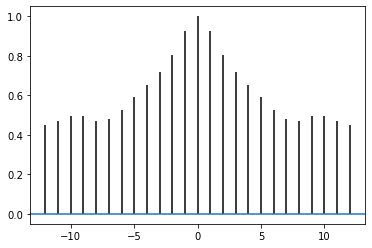

In [21]:
df2 = pd.to_numeric(df_prep['demand'],downcast='float')
plt.acorr(df2,maxlags=12)
pass

From the above plot we can see that there is autocorrelation in the demand. Auto correlation means the value of demand at time t is dependent on the value at time t-1 or t-2 ... The idependent variable demand has auto correlation and it has a log normal distribution.We need to fix this to improve our results.

### Transforming Demand to Normal Distribution 

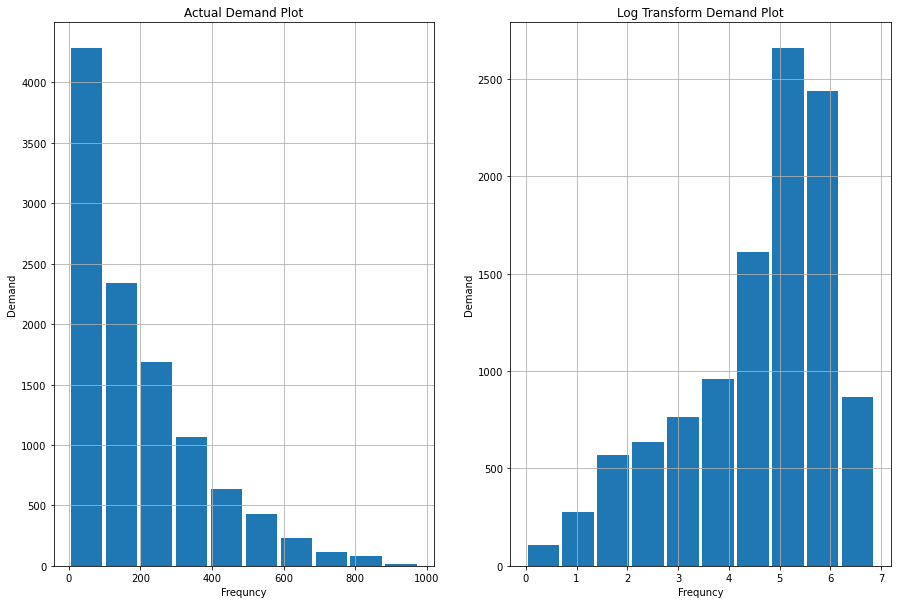

In [22]:
d1 = df_prep['demand']
d2 = np.log(d1)

plt.figure(figsize=(15,10))
plt.subplot(1,2,1,)
plt.title('Actual Demand Plot')
plt.xlabel('Frequncy')
plt.ylabel('Demand')
d1.hist(rwidth=0.9)

plt.subplot(1,2,2,)
plt.title('Log Transform Demand Plot')
plt.xlabel('Frequncy')
plt.ylabel('Demand')
d2.hist(rwidth=0.9)

pass


From the above plot we can see that by doing a log transform on the demand we can convert it to a normal distribution curve.

In [23]:
df_prep['demand'] = np.log(df_prep['demand'])
#df_prep

### Taking Care of Auto Correlation 

In [24]:
t_1 = df_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = df_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = df_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

In [25]:
df_prep_lag = pd.concat([df_prep,t_1,t_2,t_3],axis=1)
df_prep_lag = df_prep_lag.dropna()
df_prep_lag.head()

,season,weather,temp,humidity,windspeed,demand,month,hour,t-1,t-2,t-3
3,1,1,9.84,75,0.0000,2.564949,1,3,3.465736,3.688879,2.772589
4,1,1,9.84,75,0.0000,0.000000,1,4,2.564949,3.465736,3.688879
5,1,2,9.84,75,6.0032,0.000000,1,5,0.000000,2.564949,3.465736
6,1,1,9.02,80,0.0000,0.693147,1,6,0.000000,0.000000,2.564949
7,1,1,8.20,86,0.0000,1.098612,1,7,0.693147,0.000000,0.000000


From the above table one can observe that we have created addition column of features t-1,t-2,t-3 to take care of autocorrelation oof the demand dataset.This additional created features will be used to predict the demand.

# 5.Create Dummy Variables

In [26]:
df_prep_lag.dtypes

season         int64
weather        int64
temp         float64
humidity       int64
windspeed    float64
demand       float64
month          int64
hour           int64
t-1          float64
t-2          float64
t-3          float64
dtype: object

For making the dummies command to work we need the categorical data in object or category type.Let covert the type of data.

In [27]:
df_prep_lag['season'] = df_prep_lag['season'].astype('category')
df_prep_lag['weather'] = df_prep_lag['weather'].astype('category')
df_prep_lag['month'] = df_prep_lag['month'].astype('category')
df_prep_lag['hour'] = df_prep_lag['hour'].astype('category')
dummy_df = pd.get_dummies(df_prep_lag,drop_first=True)
dummy_df.head()
#dummy_df.shape

,temp,humidity,windspeed,demand,t-1,t-2,t-3,season_2,season_3,season_4,weather_2,weather_3,weather_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
3,9.84,75,0.0000,2.564949,3.465736,3.688879,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.84,75,0.0000,0.000000,2.564949,3.465736,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,9.84,75,6.0032,0.000000,0.000000,2.564949,3.465736,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,9.02,80,0.0000,0.693147,0.000000,0.000000,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8.20,86,0.0000,1.098612,0.693147,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


So we have created dummy variables and avoided the dummy variable trap by removing the unwanted column of categorical data.

# 6.Train Test Split

In [28]:
y = df_prep_lag[['demand']]
X = df_prep_lag.drop(['demand'],axis=1)

In [29]:
# Creating the training set at 70%
tr_size = 0.7*len(X)
tr_size = int(tr_size)

X_train = X.values[0:tr_size]
X_test = X.values[tr_size:len(X)]

y_train = y.values[0:tr_size]
y_test = y.values[tr_size:len(y)]

Our demand data is a time series data.So the sequence of the data for features are important to predict demand.So while splitting the data we have maintained the sequence of the data.

# 7.Fit and Score Model

In [30]:
from sklearn.linear_model import LinearRegression 

std_reg = LinearRegression()
std_reg.fit(X_train,y_train)

LinearRegression()

### R Square Error 

In [31]:
r2_train = std_reg.score(X_train,y_train)
r2_test = std_reg.score(X_test,y_test)
print('R Suared Error for Train set:',r2_train)
print('R Suared Error for Test set:',r2_test)

R Suared Error for Train set: 0.8627353465714249
R Suared Error for Test set: 0.8865223634446046


The R square value for the test set is higher.Which tells us that there is no overfitting in the model.

In [32]:
# Create Predictions 
y_predict = std_reg.predict(X_test)


### RMSE

In [33]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test,y_predict))
print('RMSE of the model:',rmse)

RMSE of the model: 0.4685808629145551


Low value of RMSE tells us that our model is quite good.

### RMSLE

In [34]:
y_test_e = []
y_predict_e = []


for i in range(0,len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_predict_e.append(math.exp(y_predict[i]))
    
# Calculate the sum
log_sq_sum = 0.0

for i in range(0,len(y_test_e)):
    log_a = math.log(y_test_e[i] +1)
    log_p = math.log(y_predict_e[i] +1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff
    
rmsle = math.sqrt(log_sq_sum/len(y_test))
print(rmsle)


0.4476284768565324


# 8.Result Discussion 

We have completed the task of predicting the demand for bikes. In this kernels we have go through topics like data exploration,data cleaning,Feature selection and finally model build using Multi Linear Regression.We have got a got level of R square value of around 86%